In [591]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [592]:

url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv'
df = pd.read_csv(url)

In [593]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# ajustando dados

In [594]:
df.sex = df.sex.replace({'male' : 1, 'female': 0})

In [595]:
df =df.drop(['who', 'embark_town', 'deck', 'survived', 'adult_male', 'embark_town', 'class', 'embarked'], axis=1)

In [596]:
df = df[~df.age.isnull()]

In [597]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  714 non-null    int64  
 1   sex     714 non-null    int64  
 2   age     714 non-null    float64
 3   sibsp   714 non-null    int64  
 4   parch   714 non-null    int64  
 5   fare    714 non-null    float64
 6   alive   714 non-null    object 
 7   alone   714 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(1)
memory usage: 45.3+ KB


# separando conjuntos de dados

In [598]:
from sklearn.model_selection import train_test_split

In [599]:
x = df.drop(['alive'], axis=1)
y = df.alive

In [600]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [601]:
len(x_train)

499

In [602]:
len(y_train)

499

# gerando modelos

In [603]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn import metrics

In [604]:
forest = RandomForestClassifier(n_estimators=100, random_state=100)
forest.fit(x_train,y_train)
y_predicted = forest.predict(x_test)
print("Acurácia:",metrics.accuracy_score(y_test, y_predicted))

Acurácia: 0.8093023255813954


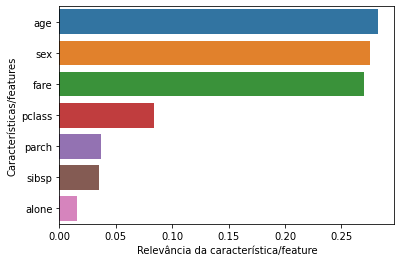

In [605]:
feature_imp = pd.Series(forest.feature_importances_,index=x_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Relevância da característica/feature')
plt.ylabel('Características/features')
plt.show()



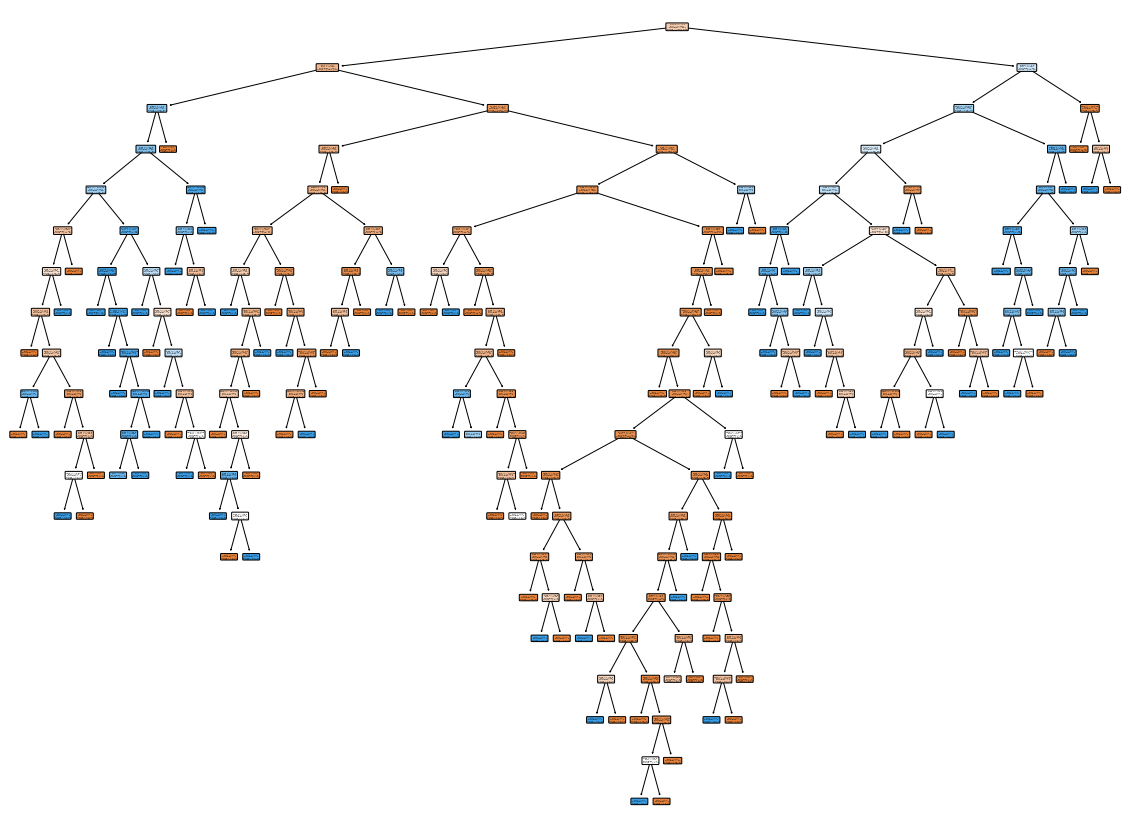

In [606]:

fig = plt.figure(figsize=(20, 15))
plot_tree(forest.estimators_[0],
          feature_names=x_train.columns,
          class_names=df['alive'].unique(),
          filled=True, rounded=True)

plt.show()